<a href="https://colab.research.google.com/github/khatriaditya1516/noise_cancellation_by_ai/blob/main/noise_cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 4.3617
Epoch 2/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0278  
Epoch 3/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7364 
Epoch 4/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1062
Epoch 5/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5595 
Epoch 6/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5046 
Epoch 7/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0846 
Epoch 8/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.3196 
Epoch 9/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6372
Epoch 10/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8555 
Epoch 11/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1791 
Epoch 12/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1366 
Epoch 13/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7934 
Epoch 14/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2770 
Epoch 15/40
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.1107 
Epoch 

,Actual Noise,Predicted Noise
0,-0.032972,0.488516
1,5.028100,0.408712
2,-0.475105,0.176087
3,-0.665468,0.236966
4,-1.061599,0.114967
5,-1.115039,-0.026145
6,-1.000738,-0.143629
7,-1.258774,-0.188549
8,-0.875419,-0.204070
9,-0.016596,-0.119057


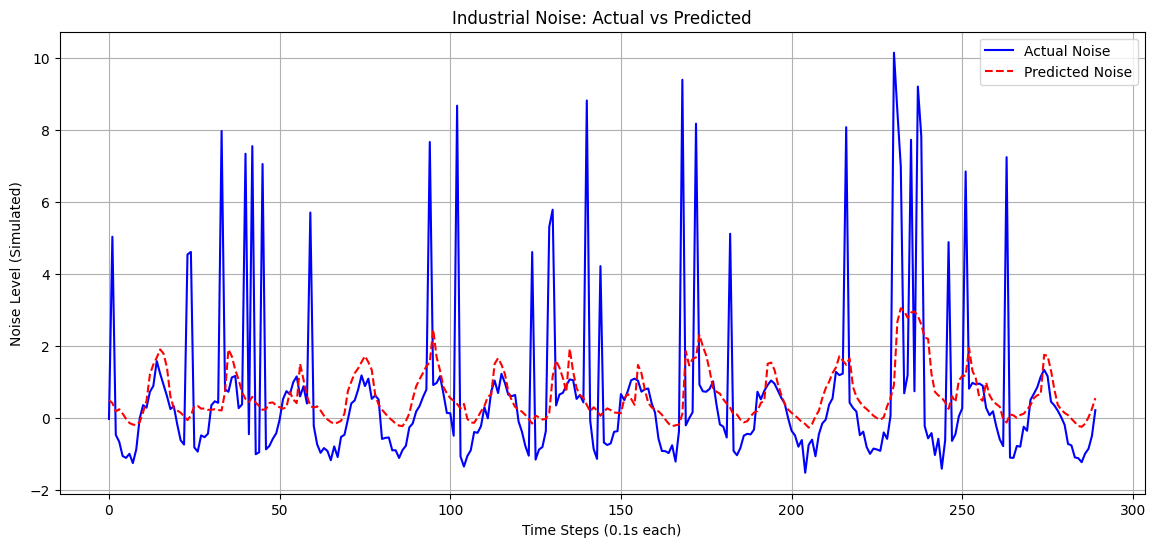

In [1]:
# Install required libraries if needed (run once)
# !pip install numpy pandas matplotlib tensorflow

# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# 2. Simulate Industrial Noise Data
np.random.seed(42)
time_steps = 300  # 30 seconds sampled every 0.1s
time = np.linspace(0, 30, time_steps)

# Base machine hum + random loud events
noise_signal = np.sin(2 * np.pi * 0.5 * time)
random_events = np.random.choice([0, 1], size=time_steps, p=[0.9, 0.1]) * np.random.uniform(5, 10, size=time_steps)
noise_data = noise_signal + random_events + np.random.normal(0, 0.2, time_steps)

# 3. Prepare Dataset for AI
X = []
y = []
window_size = 10  # Number of past samples to predict next one

for i in range(len(noise_data) - window_size):
    X.append(noise_data[i:i+window_size])
    y.append(noise_data[i+window_size])

X = np.array(X)
y = np.array(y)

# IMPORTANT: Reshape X for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 4. Build and Train LSTM Model
model = tf.keras.Sequential([
    layers.Input(shape=(window_size, 1)),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=40, verbose=1)  # Set verbose=1 to see progress

# 5. Predict Future Noise
y_pred = model.predict(X).flatten()

# 6. Display Table of Actual vs Predicted Values
df_results = pd.DataFrame({
    'Actual Noise': y,
    'Predicted Noise': y_pred
})

print("\n--- Noise Prediction Table (Top 10 Samples) ---")
display(df_results.head(10))  # In Jupyter, display() is better than print() for tables

# 7. Plot Actual vs Predicted Noise Graph
plt.figure(figsize=(14,6))
plt.plot(y, label='Actual Noise', color='blue')
plt.plot(y_pred, label='Predicted Noise', color='red', linestyle='--')
plt.title('Industrial Noise: Actual vs Predicted')
plt.xlabel('Time Steps (0.1s each)')
plt.ylabel('Noise Level (Simulated)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
